# <center>Loan Customer</center>

**Created By: Daniel Jeffry**

In [247]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for machine learning modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [208]:
test_df = pd.read_csv('app_test.csv')
train_df = pd.read_csv('app_train.csv')
instal_df = pd.read_csv('installment_payment.csv')
prev_df = pd.read_csv('prev_app.csv')

In [209]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350712 entries, 0 to 350711
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 350712 non-null  int64  
 1   SK_ID_PREV                 350712 non-null  int64  
 2   LN_ID                      350712 non-null  int64  
 3   CONTRACT_TYPE              350712 non-null  object 
 4   ANNUITY                    274103 non-null  float64
 5   APPLICATION                350712 non-null  float64
 6   APPROVED_CREDIT            350712 non-null  float64
 7   AMT_DOWN_PAYMENT           164205 non-null  float64
 8   PRICE                      271072 non-null  float64
 9   WEEKDAYS_APPLY             350712 non-null  object 
 10  HOUR_APPLY                 350712 non-null  int64  
 11  CONTRACT_STATUS            350712 non-null  object 
 12  DAYS_DECISION              350712 non-null  int64  
 13  TERM_PAYMENT               27

In [210]:
train_df

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,294665,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,73002,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,184610,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


In [211]:
len(train_df.LN_ID.unique())

61503

In [212]:
prev_df = prev_df.drop(prev_df.columns[[0]], axis=1)
prev_df

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350707,1379569,309506,Cash loans,33389.100,1035000.0,1035000.0,NaN,1035000.0,THURSDAY,10,Refused,-156,60.0,low_normal,NaN,NaN,NaN,NaN
350708,1252861,363895,Cash loans,56754.000,1350000.0,1350000.0,NaN,1350000.0,THURSDAY,16,Refused,-847,48.0,middle,NaN,NaN,NaN,NaN
350709,1379406,302265,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,13,Canceled,-502,NaN,NA1,NaN,NaN,NaN,NaN
350710,2698899,161204,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,13,Canceled,-359,NaN,NA1,NaN,NaN,NaN,NaN


In [213]:
len(prev_df.LN_ID.unique())

72135

In [214]:
train_df = train_df.drop(train_df.columns[[0]], axis=1)
train_df

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LN_ID              61503 non-null  int64  
 1   TARGET             61503 non-null  int64  
 2   CONTRACT_TYPE      61503 non-null  object 
 3   GENDER             61503 non-null  object 
 4   NUM_CHILDREN       61503 non-null  int64  
 5   INCOME             61503 non-null  float64
 6   APPROVED_CREDIT    61503 non-null  float64
 7   ANNUITY            61502 non-null  float64
 8   PRICE              61441 non-null  float64
 9   INCOME_TYPE        61503 non-null  object 
 10  EDUCATION          61503 non-null  object 
 11  FAMILY_STATUS      61503 non-null  object 
 12  HOUSING_TYPE       61503 non-null  object 
 13  DAYS_AGE           61503 non-null  int64  
 14  DAYS_WORK          61503 non-null  int64  
 15  DAYS_REGISTRATION  61503 non-null  float64
 16  DAYS_ID_CHANGE     615

In [216]:
instal_df = instal_df.drop(instal_df.columns[[0]], axis=1)
instal_df

,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000
...,...,...,...,...,...,...,...
2872301,1024845,407119,5,-224.0,-230.0,24819.660,24819.660
2872302,2597827,448211,18,-44.0,-44.0,915.795,915.795
2872303,2003162,450999,16,-2135.0,-2113.0,5414.265,5384.880
2872304,2149043,415032,9,-425.0,-434.0,46517.490,46517.490


# Data Preprocessing

In [217]:
train_df

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


In [218]:
# Aggregate Target Rate by Total Client
df_target_percentage = train_df.groupby('TARGET').agg(Client = ('TARGET','count'))
df_target_percentage.reset_index(inplace=True)

df_target_percentage['%Percentage'] = round(100 * df_target_percentage['Client']/df_target_percentage['Client'].sum(), 2)

df_target_percentage

,TARGET,Client,%Percentage
0,0,56534,91.92
1,1,4969,8.08


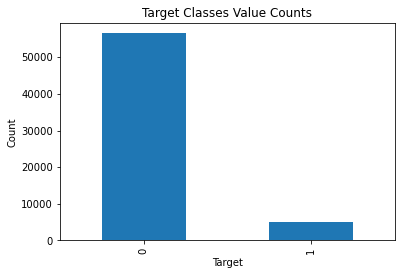

In [219]:
# visualize TARGET value counts
train_df['TARGET'].value_counts().plot(kind='bar');
plt.title('Target Classes Value Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Most of clients can repay their loans, and a few are with difficulties, so data is imbalanced. In this case we must keep in mind 2 things:
- data should be balanced
- accuracy is not a proper evaluation metric, it will be misleading,but F1-score or ROC AUC scores is proper in this case.
- We can convert **DAYS_AGE** and **DAYS_WORK** columns into years.
- Delete the **Days Registration** column because this data shows the time the client changed his registration and this has no effect on failure to pay loan installments.
- Removed the **Days ID Change** column because this data contains the time the client changed identity and this also has no effect on the target.
- Delete the **Weekdays Apply** column which contains the day the client offers a loan.

In [220]:
# Drop Years work & Days Work
train_df['YEARS_WORK'] = np.abs(train_df['DAYS_WORK']) / 365
train_df['AGE'] = np.abs(train_df['DAYS_AGE']) / 365
train_df = train_df.drop(['DAYS_WORK', 'DAYS_AGE', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY','HOUR_APPLY'], axis = 1)
train_df

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,YEARS_WORK,AGE
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,Business Entity Type 3,0.572805,0.608276,NaN,2.523288,31.613699
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,0.655600,0.684298,NaN,12.279452,43.131507
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,NA1,NaN,0.580687,0.749022,1000.665753,56.917808
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,Culture,NaN,0.623740,0.710674,28.643836,56.600000
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Construction,0.175511,0.492994,0.085595,3.260274,24.693151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,Secondary / secondary special,Married,House / apartment,Electricity,0.295858,0.104877,0.616122,15.926027,39.090411
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,Secondary / secondary special,Married,House / apartment,NA1,0.693816,0.411595,0.239226,1000.665753,59.128767
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,Higher education,Married,House / apartment,Industry: type 12,0.802154,0.714627,NaN,4.284932,48.572603
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,Secondary / secondary special,Married,House / apartment,Business Entity Type 3,NaN,0.694125,0.105473,11.394521,30.843836


## Missing Data

In [221]:
# find the null values
train_df.isnull().sum()

LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
YEARS_WORK               0
AGE                      0
dtype: int64

* `ANNUITY` & `PRICE` \: Drop saja (karena jumlahnya kecil)
* `ORGANIZATION_TYPE` \: Contains 11253 null data
* `EXT_SCORE_1` & `EXT_SCORE_3` \: both of these data can be deleted because they contain large null data so we can use **EXT_SCORE_2** data to represent scores from external data.
* `EXT_SCORE_2` \: input with the median value because the distribution is skewed.

In [222]:
# drop `ANNUITY`,  `PRICE`, EXT_SCORE_1, EXT_SCORE_1
train_df = train_df.dropna(subset=['ANNUITY','PRICE'])
train_df['EXT_SCORE_2'].fillna(train_df['EXT_SCORE_2'].median(), inplace=True)
train_df.isna().sum()

LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  0
PRICE                    0
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34818
EXT_SCORE_2              0
EXT_SCORE_3          12225
YEARS_WORK               0
AGE                      0
dtype: int64

In [223]:
train_df = train_df.drop(['EXT_SCORE_1', 'EXT_SCORE_3'], axis = 1)

In [224]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61440 entries, 0 to 61502
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LN_ID              61440 non-null  int64  
 1   TARGET             61440 non-null  int64  
 2   CONTRACT_TYPE      61440 non-null  object 
 3   GENDER             61440 non-null  object 
 4   NUM_CHILDREN       61440 non-null  int64  
 5   INCOME             61440 non-null  float64
 6   APPROVED_CREDIT    61440 non-null  float64
 7   ANNUITY            61440 non-null  float64
 8   PRICE              61440 non-null  float64
 9   INCOME_TYPE        61440 non-null  object 
 10  EDUCATION          61440 non-null  object 
 11  FAMILY_STATUS      61440 non-null  object 
 12  HOUSING_TYPE       61440 non-null  object 
 13  ORGANIZATION_TYPE  61440 non-null  object 
 14  EXT_SCORE_2        61440 non-null  float64
 15  YEARS_WORK         61440 non-null  float64
 16  AGE                614

In [225]:
train_df.isnull().sum()

LN_ID                0
TARGET               0
CONTRACT_TYPE        0
GENDER               0
NUM_CHILDREN         0
INCOME               0
APPROVED_CREDIT      0
ANNUITY              0
PRICE                0
INCOME_TYPE          0
EDUCATION            0
FAMILY_STATUS        0
HOUSING_TYPE         0
ORGANIZATION_TYPE    0
EXT_SCORE_2          0
YEARS_WORK           0
AGE                  0
dtype: int64

## Duplicated Data

In [226]:
train_df.duplicated().sum()

0

None duplicate data

## Columns Correlation

In [227]:
# Top 5 Columns with Positive Correlation with our TARGET 
print('Top 5 Columns with Positive Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().tail(5))

# Negative ones
print('\nTop 5 Columns with Negative Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().head(5))

Top 5 Columns with Positive Correlation with TARGET
 --------------------------------------------------
INCOME         -0.020766
ANNUITY        -0.018931
LN_ID           0.003279
NUM_CHILDREN    0.018717
TARGET          1.000000
Name: TARGET, dtype: float64

Top 5 Columns with Negative Correlation with TARGET
 --------------------------------------------------
EXT_SCORE_2       -0.159392
AGE               -0.083521
YEARS_WORK        -0.051902
PRICE             -0.047930
APPROVED_CREDIT   -0.039307
Name: TARGET, dtype: float64


There's no high correlation between our target and any feature. External data sources is so important with our target.

## Statistical Summary

In [228]:
train_df.columns

Index(['LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'ORGANIZATION_TYPE', 'EXT_SCORE_2',
       'YEARS_WORK', 'AGE'],
      dtype='object')

In [229]:
cats = ['TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'ORGANIZATION_TYPE']
nums = ['INCOME', 'ANNUITY', 'PRICE', 'APPROVED_CREDIT', 'YEARS_WORK', 'AGE', 'EXT_SCORE_2']

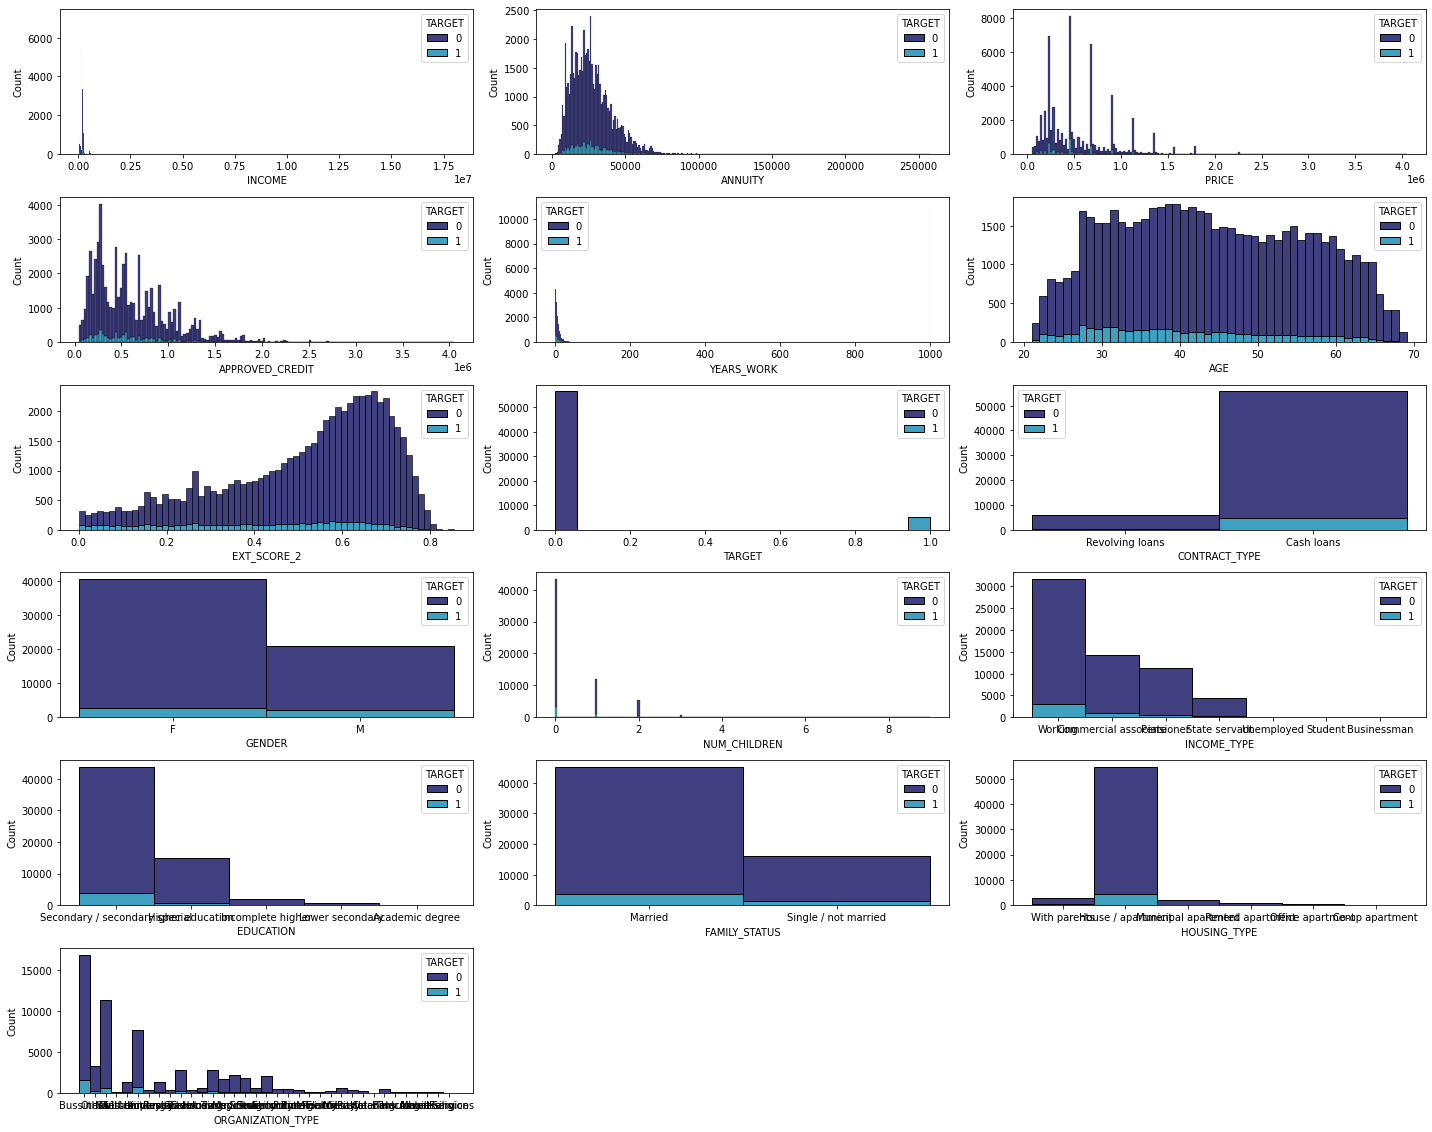

In [26]:
plt.figure(figsize=(20, 18))
for i, col in enumerate(train_df[nums+cats].columns):
    plt.subplot(7, 3, i+1)
    ax = sns.histplot(x=train_df[col], hue=train_df['TARGET'], data=train_df, palette='ocean', multiple='stack')
    plt.tight_layout()

## Value Counting

Value counting of each categorical

In [230]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train_df[col].value_counts())
    print()

Value count kolom TARGET:
0    56477
1     4963
Name: TARGET, dtype: int64

Value count kolom CONTRACT_TYPE:
Cash loans         55698
Revolving loans     5742
Name: CONTRACT_TYPE, dtype: int64

Value count kolom GENDER:
F    40502
M    20938
Name: GENDER, dtype: int64

Value count kolom NUM_CHILDREN:
0    43256
1    12066
2     5279
3      729
4       78
5       25
6        3
7        2
8        1
9        1
Name: NUM_CHILDREN, dtype: int64

Value count kolom INCOME_TYPE:
Working                 31576
Commercial associate    14208
Pensioner               11244
State servant            4403
Unemployed                  5
Student                     3
Businessman                 1
Name: INCOME_TYPE, dtype: int64

Value count kolom EDUCATION:
Secondary / secondary special    43734
Higher education                 14875
Incomplete higher                 2039
Lower secondary                    758
Academic degree                     34
Name: EDUCATION, dtype: int64

Value count kolom FAMILY_

In [231]:
train_df['FAMILY_STATUS'].replace('Civil marriage', 'Married', inplace=True)
train_df['FAMILY_STATUS'].replace('Separated', 'Single / not married', inplace=True)
train_df['FAMILY_STATUS'].replace('Widow', 'Single / not married', inplace=True)

In [232]:
train_df['FAMILY_STATUS'].value_counts()

Married                 45205
Single / not married    16235
Name: FAMILY_STATUS, dtype: int64

In the **Family Status** column, I changed it to only 2 unique values, namely married and single / not married. this is done in order to reduce the unique values in the column.

In [233]:
train_df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'Other', 'NA1', 'Culture',
       'Construction', 'Self-employed', 'University', 'Kindergarten',
       'Business Entity Type 2', 'Restaurant', 'Trade: type 3',
       'Services', 'Housing', 'Business Entity Type 1',
       'Industry: type 9', 'Trade: type 7', 'Transport: type 4',
       'Medicine', 'Transport: type 3', 'Trade: type 5', 'Trade: type 2',
       'School', 'Industry: type 13', 'Industry: type 7', 'Security',
       'Government', 'Agriculture', 'Industry: type 3', 'Police',
       'Transport: type 2', 'Industry: type 4', 'Security Ministries',
       'Emergency', 'Realtor', 'Electricity', 'Industry: type 11',
       'Military', 'Industry: type 5', 'Postal', 'Trade: type 6',
       'Industry: type 1', 'Hotel', 'Industry: type 6',
       'Transport: type 1', 'Cleaning', 'Bank', 'Telecom', 'Insurance',
       'Mobile', 'Advertising', 'Industry: type 12', 'Legal Services',
       'Trade: type 1', 'Industry: type 2', 'Trade: type 4',
       'Ind

The organization_type column has too many unique values. It can be seen that there are data such as the same organization which is only distinguished by type, so that we can combine data like this to reduce unique value.
- Business Entity Type 1 which we can unite into Bussiness.
- Industry: type 1 which can be combined into Industry.
- Trade: type 1 which can be merged into Trade.
- Transport: type 1 which can be combined into Transport.
- NA1 can be assumed as a client who does not have a permanent job (Unemployed).

In [234]:
train_df['ORGANIZATION_TYPE'].replace('Business Entity Type 1', 'Bussiness', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Business Entity Type 2', 'Bussiness', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Business Entity Type 3', 'Bussiness', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 1', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 2', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 3', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 4', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 5', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 6', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 7', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 8', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 9', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 10', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 11', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 12', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Industry: type 13', 'Industry', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 1', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 2', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 3', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 4', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 5', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 6', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Trade: type 7', 'Trader', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Transport: type 1', 'Transport', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Transport: type 2', 'Transport', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Transport: type 3', 'Transport', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('Transport: type 4', 'Transport', inplace=True)
train_df['ORGANIZATION_TYPE'].replace('NA1', 'None', inplace=True)

In [235]:
# Recheck After Replacing Similar/Unusual Value
for col in cats:
    print(f'''Value count column {col}:''')
    print(train_df[col].value_counts())
    print('---'*10, '\n')

Value count column TARGET:
0    56477
1     4963
Name: TARGET, dtype: int64
------------------------------ 

Value count column CONTRACT_TYPE:
Cash loans         55698
Revolving loans     5742
Name: CONTRACT_TYPE, dtype: int64
------------------------------ 

Value count column GENDER:
F    40502
M    20938
Name: GENDER, dtype: int64
------------------------------ 

Value count column NUM_CHILDREN:
0    43256
1    12066
2     5279
3      729
4       78
5       25
6        3
7        2
8        1
9        1
Name: NUM_CHILDREN, dtype: int64
------------------------------ 

Value count column INCOME_TYPE:
Working                 31576
Commercial associate    14208
Pensioner               11244
State servant            4403
Unemployed                  5
Student                     3
Businessman                 1
Name: INCOME_TYPE, dtype: int64
------------------------------ 

Value count column EDUCATION:
Secondary / secondary special    43734
Higher education                 14875
Incompl

## Outliers Handling
Kita akan menggunakan Z-score filtering

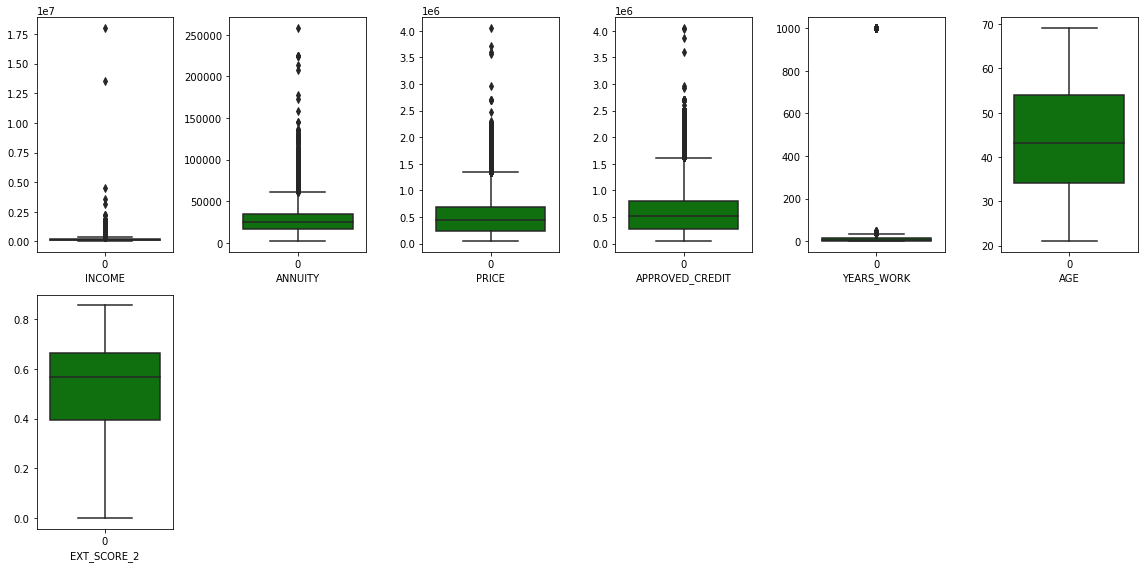

In [236]:
plt.figure(figsize=(16,8))

for i in range(0,len(nums)):
  plt.subplot(2,6,i+1)
  axes = sns.boxplot(data=train_df[nums[i]],color='green',orient='v')
  plt.xlabel(nums[i])
  plt.tight_layout()

In [237]:
train_df.loc[train_df['YEARS_WORK']>1000]

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,ORGANIZATION_TYPE,EXT_SCORE_2,YEARS_WORK,AGE
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,None,0.580687,1000.665753,56.917808
13,228340,0,Cash loans,M,0,202500.0,835380.0,42651.0,675000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,None,0.608755,1000.665753,57.123288
18,256830,0,Cash loans,F,0,126000.0,733315.5,41076.0,679500.0,Pensioner,Secondary / secondary special,Married,House / apartment,None,0.297193,1000.665753,62.887671
20,409569,0,Cash loans,F,2,135000.0,270000.0,17401.5,270000.0,Pensioner,Secondary / secondary special,Married,House / apartment,None,0.474963,1000.665753,60.512329
23,314836,0,Cash loans,F,0,54000.0,254700.0,15709.5,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,None,0.244904,1000.665753,65.594521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61472,136487,0,Cash loans,M,0,180000.0,1647000.0,43447.5,1647000.0,Pensioner,Secondary / secondary special,Married,House / apartment,None,0.706691,1000.665753,58.868493
61479,356588,0,Cash loans,F,0,225000.0,945000.0,40167.0,945000.0,Pensioner,Higher education,Married,House / apartment,None,0.729316,1000.665753,59.736986
61493,114153,0,Cash loans,F,0,90000.0,284400.0,16456.5,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,None,0.194266,1000.665753,65.904110
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,Secondary / secondary special,Married,House / apartment,None,0.411595,1000.665753,59.128767


- There are 11248 data that makes no sense in the **YEARS_WORK** column where the client has been working for more than 1000 years. This data includes data that does not make sense (Outlier) so this data must be deleted.
- Based on the graphic information on the distribution of data for each feature, there are outliers in each feature but the distribution of outliers is not very clear. so that further treatment is needed by using the z-score method to determine the limit of values that are classified as outliers.

In [238]:
train_df=train_df[ ~(train_df['YEARS_WORK']>1000) ]

In [239]:
train_df[nums].describe()

,INCOME,ANNUITY,PRICE,APPROVED_CREDIT,YEARS_WORK,AGE,EXT_SCORE_2
count,5.019200e+04,50192.000000,5.019200e+04,5.019200e+04,50192.000000,50192.000000,5.019200e+04
mean,1.765239e+05,27858.054750,5.487264e+05,6.115000e+05,6.521703,40.472495,5.164950e-01
std,1.423175e+05,14594.723507,3.729013e+05,4.064918e+05,6.379261,10.004633,1.899448e-01
min,2.700000e+04,2205.000000,4.500000e+04,4.500000e+04,0.008219,21.021918,8.173617e-08
25%,1.125000e+05,17095.500000,2.475000e+05,2.784600e+05,2.117808,32.292466,3.997294e-01
50%,1.575000e+05,25830.000000,4.500000e+05,5.212800e+05,4.504110,39.957534,5.675588e-01
75%,2.160000e+05,35685.000000,6.930000e+05,8.295840e+05,8.726712,48.099315,6.642855e-01
max,1.800009e+07,258025.500000,4.050000e+06,4.050000e+06,49.073973,69.041096,8.549997e-01


### Calculate the number of outlier percentages for each feature

In [240]:
from scipy import stats

lista=[]
for i in nums:
  zscore =np.abs(stats.zscore(train_df[i]))
  filter = (zscore > 3)
  data_filter = train_df[filter]
  outlier_percentage = ((len(data_filter)/len(train_df[i]))*100)
  lista.append(outlier_percentage)
  print(f'Persentase outlier {i} = ',outlier_percentage)

print('total outlier = ',sum(lista))

Persentase outlier INCOME =  0.6016895122728722
Persentase outlier ANNUITY =  0.9025342684093083
Persentase outlier PRICE =  1.4404686005737966
Persentase outlier APPROVED_CREDIT =  1.1157156518967166
Persentase outlier YEARS_WORK =  2.219477207523111
Persentase outlier AGE =  0.0
Persentase outlier EXT_SCORE_2 =  0.0
total outlier =  6.279885240675805


The total percentage of features is 6.3% of the total data. The total percentage of outliers does not reflect the total outliers with certainty, because it is possible that in one row there are several outlier features. Perhaps from this result that needs to be considered is the percentage of outliers for each feature.

### Drop Outlier with Z-Scores

In [241]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(train_df)}')

filtered_entries = np.array([True] * len(train_df))  #Memanipulasi seakan akan datanya diisi oleh data true semuanya, kemudian nanti dimodifikasi.
for i in nums:
  zscore =np.abs(stats.zscore(train_df[i]))
  filtered_entries = (zscore < 3) & (filtered_entries)

train_df=train_df[filtered_entries]
print('Jumlah data setelah di filter',len(train_df))

Jumlah baris sebelum memfilter outlier: 50192
Jumlah data setelah di filter 47807


In [242]:
# Check Statistical Descriptive after handling outliers
train_df[nums].describe()

,INCOME,ANNUITY,PRICE,APPROVED_CREDIT,YEARS_WORK,AGE,EXT_SCORE_2
count,47807.000000,47807.000000,4.780700e+04,4.780700e+04,47807.000000,47807.000000,4.780700e+04
mean,169516.378213,26834.874087,5.219412e+05,5.835075e+05,5.933321,40.101301,5.131149e-01
std,80642.741360,12818.280865,3.305388e+05,3.640569e+05,5.183281,9.876928,1.905585e-01
min,27000.000000,2205.000000,4.500000e+04,4.500000e+04,0.008219,21.021918,8.173617e-08
25%,112500.000000,16875.000000,2.385000e+05,2.710665e+05,2.052055,32.026027,3.941402e-01
50%,157500.000000,25407.000000,4.500000e+05,5.112495e+05,4.358904,39.572603,5.649728e-01
75%,202500.000000,34686.000000,6.795000e+05,8.086500e+05,8.302740,47.502740,6.615932e-01
max,585000.000000,71599.500000,1.665000e+06,1.829691e+06,25.657534,68.679452,8.549997e-01


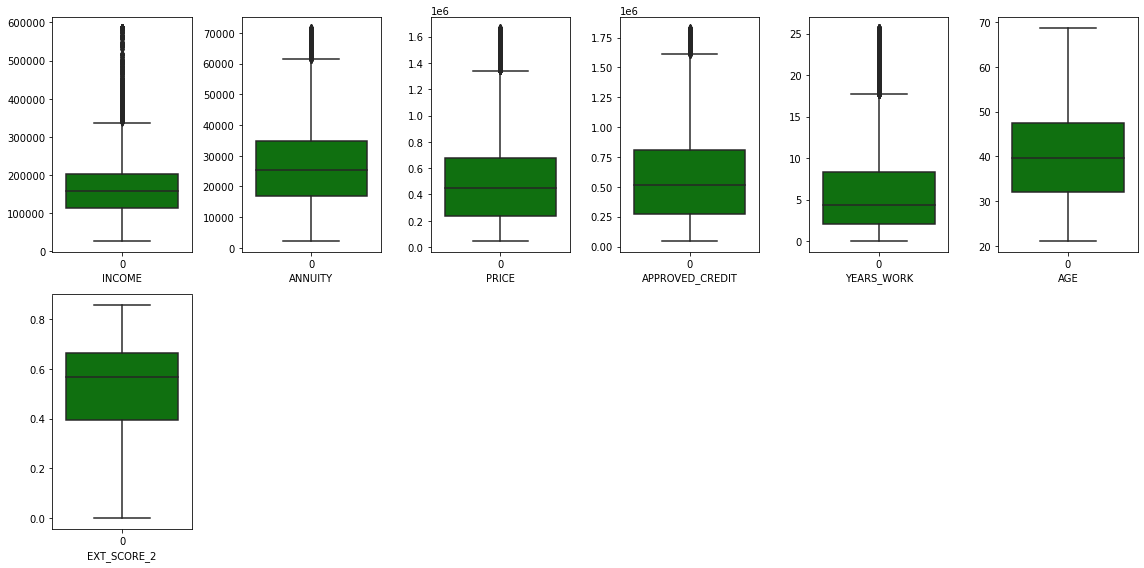

In [243]:
plt.figure(figsize=(16,8))

for i in range(0,len(nums)):
  plt.subplot(2,6,i+1)
  axes = sns.boxplot(data=train_df[nums[i]],color='green',orient='v')
  plt.xlabel(nums[i])
  plt.tight_layout()

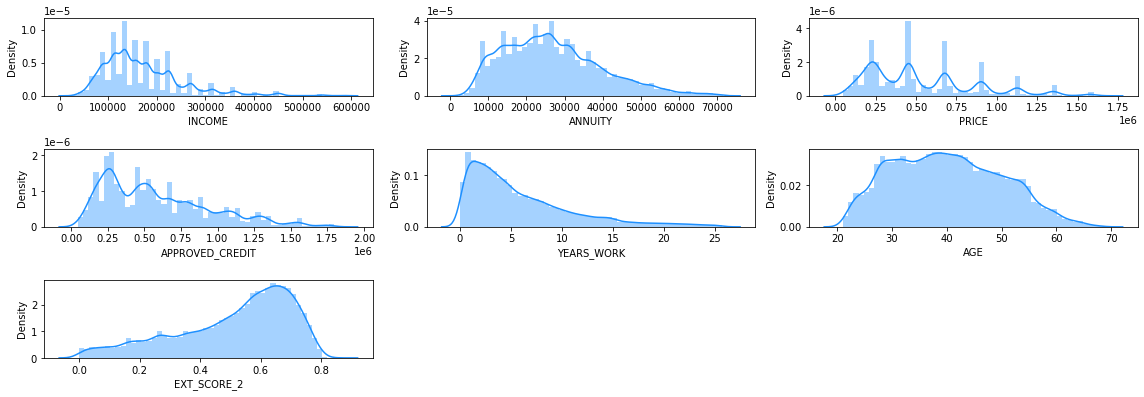

In [173]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.distplot(x=train_df[nums[i]], color='dodgerblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

This data already has a better graph. Next we can compare the target values after removing outliers.

### Feature Engineering

- Here we can create a new feature to find out the ratio of their income to the total loan and also the percentage of their credit with their income. This table can be useful to find out what percentage of the total loan and income ratio of those whose installment payments are more than the specified day (Target = 1).
- From this table we can also see whether the loan amount requested by the client exceeds their total income, causing the client to default > 30 days.

In [244]:
## create Credit/Income and Annuity/Income percentages
train_df['Credit/Income'] = train_df['APPROVED_CREDIT']/train_df['INCOME']
train_df['Annuity/Income'] = train_df['ANNUITY']/train_df['INCOME']

## show only clients with late payment
train_df[train_df['TARGET']==1].sort_values(by='Credit/Income', ascending=True)

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,ORGANIZATION_TYPE,EXT_SCORE_2,YEARS_WORK,AGE,Credit/Income,Annuity/Income
15384,223392,1,Cash loans,M,1,540000.0,106974.0,8451.0,94500.0,Working,Secondary / secondary special,Married,House / apartment,Transport,0.000868,2.873973,36.709589,0.198100,0.015650
33826,281213,1,Cash loans,M,2,405000.0,83403.0,10026.0,72000.0,Commercial associate,Higher education,Married,House / apartment,Other,0.597428,10.449315,41.016438,0.205933,0.024756
8584,380792,1,Cash loans,F,1,585000.0,153000.0,12397.5,153000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Trader,0.114283,2.945205,26.690411,0.261538,0.021192
31976,384355,1,Cash loans,F,0,171000.0,50940.0,6174.0,45000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Bussiness,0.371896,4.580822,41.493151,0.297895,0.036105
47487,445447,1,Cash loans,M,0,270000.0,90000.0,10809.0,90000.0,Working,Secondary / secondary special,Married,House / apartment,Industry,0.441755,1.509589,44.989041,0.333333,0.040033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56783,180706,1,Cash loans,F,0,90000.0,1546020.0,45333.0,1350000.0,Working,Secondary / secondary special,Married,House / apartment,Bussiness,0.265303,1.002740,29.328767,17.178000,0.503700
36212,277889,1,Cash loans,F,0,45000.0,808650.0,26217.0,675000.0,Working,Secondary / secondary special,Married,Municipal apartment,Medicine,0.576272,10.191781,38.704110,17.970000,0.582600
36111,168511,1,Cash loans,F,0,54000.0,997335.0,29160.0,832500.0,Working,Secondary / secondary special,Married,House / apartment,Other,0.229861,14.249315,42.909589,18.469167,0.540000
7720,234255,1,Cash loans,F,0,58500.0,1315737.0,35410.5,1120500.0,State servant,Secondary / secondary special,Married,House / apartment,Medicine,0.606357,17.958904,40.972603,22.491231,0.605308


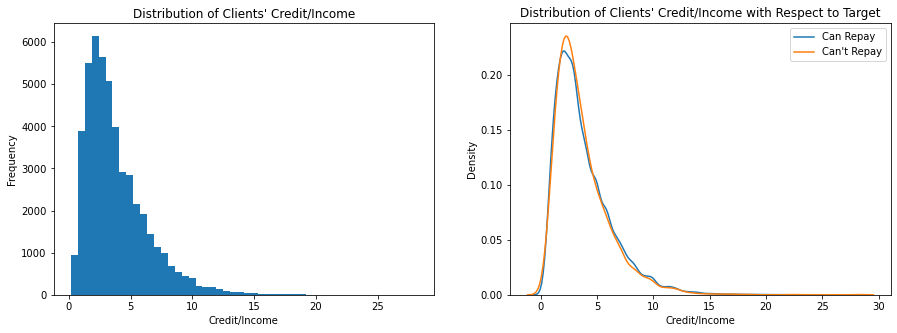

In [245]:
# Is there relation between the age and the ability to repay?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['Credit/Income'].plot(kind='hist', bins=50, title='Distribution of Clients\' Credit/Income');
plt.xlabel('Credit/Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_credit_df = train_df[['Credit/Income', 'TARGET']]
proper_credit_df['Credit/Income'] = proper_credit_df['Credit/Income']
sns.distplot(proper_credit_df[proper_credit_df['TARGET']==0]['Credit/Income'], hist=False, label='Can Repay');
sns.distplot(proper_credit_df[proper_credit_df['TARGET']==1]['Credit/Income'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Credit/Income with Respect to Target')
plt.xlabel('Credit/Income')
plt.legend();
plt.show()

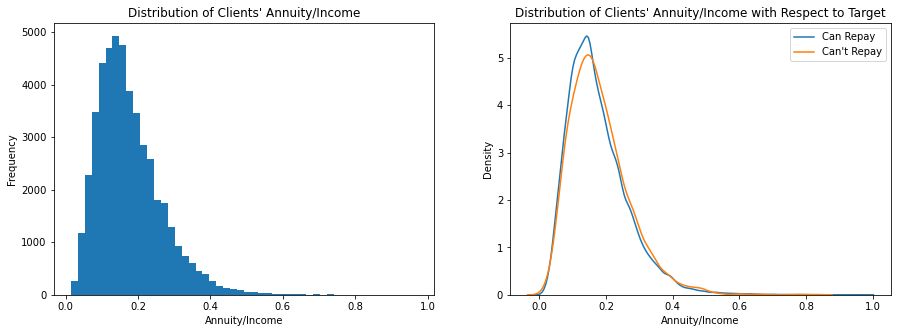

In [176]:
# Is there relation between the age and the ability to repay?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['Annuity/Income'].plot(kind='hist', bins=50, title='Distribution of Clients\' Annuity/Income');
plt.xlabel('Annuity/Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_Annuity_df = train_df[['Annuity/Income', 'TARGET']]
proper_Annuity_df['Annuity/Income'] = proper_Annuity_df['Annuity/Income']
sns.distplot(proper_Annuity_df[proper_Annuity_df['TARGET']==0]['Annuity/Income'], hist=False, label='Can Repay');
sns.distplot(proper_Annuity_df[proper_Annuity_df['TARGET']==1]['Annuity/Income'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Annuity/Income with Respect to Target')
plt.xlabel('Annuity/Income')
plt.legend();
plt.show()

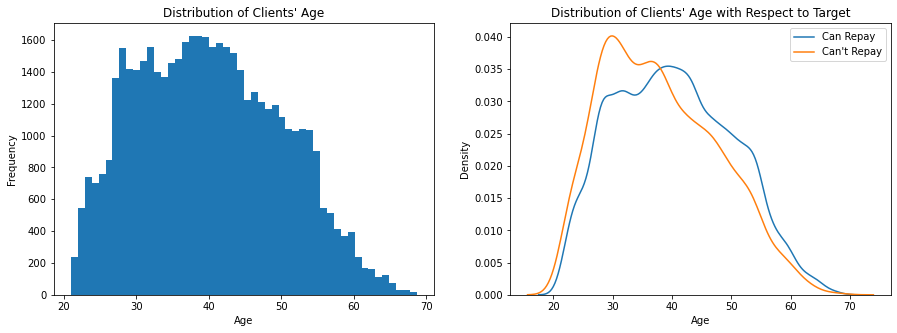

In [177]:
# Is there relation between the age and the ability to repay?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['AGE'].plot(kind='hist', bins=50, title='Distribution of Clients\' Age');
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_age_df = train_df[['AGE', 'TARGET']]
proper_age_df['AGE'] = proper_age_df['AGE']
sns.distplot(proper_age_df[proper_age_df['TARGET']==0]['AGE'], hist=False, label='Can Repay');
sns.distplot(proper_age_df[proper_age_df['TARGET']==1]['AGE'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Age with Respect to Target')
plt.xlabel('Age')
plt.legend();
plt.show()

- Clients aged about 30 years are more likely to have difficulties with repay, where those aged about 40 can repay well.
- This feature will be important for the model.

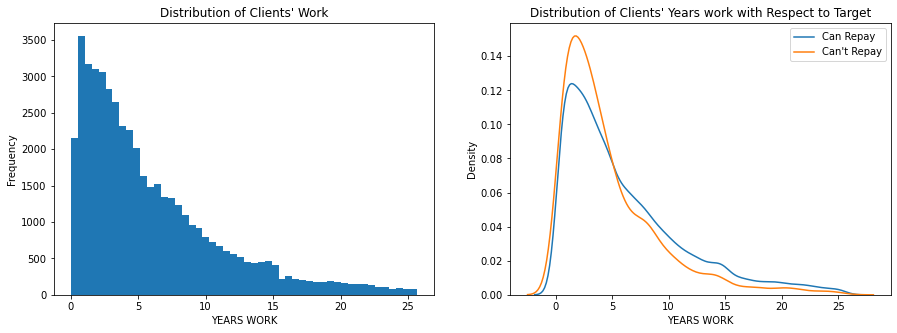

In [178]:
# Is there relation between the age and the ability to repay?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['YEARS_WORK'].plot(kind='hist', bins=50, title='Distribution of Clients\' Work');
plt.xlabel('YEARS WORK')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_year_df = train_df[['YEARS_WORK', 'TARGET']]
proper_year_df['YEARS_WORK'] = proper_year_df['YEARS_WORK']
sns.distplot(proper_year_df[proper_year_df['TARGET']==0]['YEARS_WORK'], hist=False, label='Can Repay');
sns.distplot(proper_year_df[proper_year_df['TARGET']==1]['YEARS_WORK'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Years work with Respect to Target')
plt.xlabel('YEARS WORK')
plt.legend();
plt.show()

- Clients Work about 0-5 years are more likely to have difficulties with repay, where clients work about 12 can repay well.
- This feature will be important for the model.

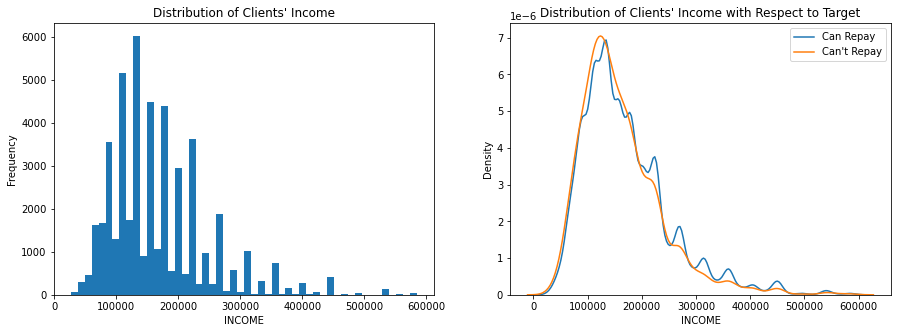

In [246]:
# Is there relation between the age and the ability to repay?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['INCOME'].plot(kind='hist', bins=50, title='Distribution of Clients\' Income');
plt.xlabel('INCOME')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_income_df = train_df[['INCOME', 'TARGET']]
proper_income_df['INCOME'] = proper_income_df['INCOME']
sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['INCOME'], hist=False, label='Can Repay');
sns.distplot(proper_income_df[proper_income_df['TARGET']==1]['INCOME'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Income with Respect to Target')
plt.xlabel('INCOME')
plt.legend();
plt.show()

- Client's with low income tends to apply for loans more than others with high income.
- Client's with income more than 500k tends always to repay, so this feature may help in our target.

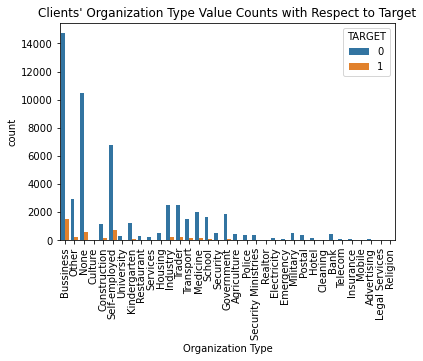

ORGANIZATION_TYPE  TARGET
Advertising        0           80
                   1           11
Agriculture        0          451
                   1           47
Bank               0          472
                             ... 
Trader             1          248
Transport          0         1518
                   1          164
University         0          281
                   1           16
Name: TARGET, Length: 70, dtype: int64

In [80]:
# what's most income type of clients?

ax = sns.countplot(data=train_df, x='ORGANIZATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' Organization Type Value Counts with Respect to Target')
plt.xlabel('Organization Type')
plt.show()

print('\n'*2)
train_df.groupby('ORGANIZATION_TYPE')['TARGET'].value_counts()

- Bussiness clients are more willing to apply for loans more than others.
- Altought a few Agriculture and students apply for loans, but they always repay.

## Feature Encoding

In [180]:
train_df['contract_label'] = train_df['CONTRACT_TYPE'].astype('category').cat.codes
train_df['children_label'] = train_df['NUM_CHILDREN'].astype('category').cat.codes
train_df['income_label'] = train_df['INCOME_TYPE'].astype('category').cat.codes
train_df['education_label'] = train_df['EDUCATION'].astype('category').cat.codes
train_df['family_label'] = train_df['FAMILY_STATUS'].astype('category').cat.codes
train_df['housing_label'] = train_df['HOUSING_TYPE'].astype('category').cat.codes
train_df['organization_label'] = train_df['ORGANIZATION_TYPE'].astype('category').cat.codes

In [181]:
train_df

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,AGE,Credit/Income,Annuity/Income,contract_label,children_label,income_label,education_label,family_label,housing_label,organization_label
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,31.613699,3.000000,0.150000,1,1,4,4,0,5,3
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,43.131507,4.823267,0.246267,0,1,0,4,0,1,19
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,24.693151,1.333333,0.066667,1,0,0,4,1,1,5
5,296530,0,Cash loans,F,2,135000.0,592560.0,32274.0,450000.0,Working,...,28.753425,4.389333,0.239067,0,2,4,1,0,1,3
6,266655,0,Cash loans,F,0,90000.0,71109.0,5746.5,54000.0,Working,...,53.197260,0.790100,0.063850,0,0,4,4,0,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61496,312885,0,Cash loans,F,0,180000.0,630747.0,22783.5,544500.0,Commercial associate,...,54.446575,3.504150,0.126575,0,0,0,4,1,1,28
61497,131041,0,Cash loans,F,2,58500.0,148365.0,12024.0,135000.0,Working,...,35.487671,2.536154,0.205538,0,2,4,4,0,1,19
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,39.090411,1.250000,0.123637,0,2,2,4,0,1,7
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,48.572603,4.444444,0.222222,1,0,0,1,0,1,12


## Standardization

In [182]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47807 entries, 0 to 61501
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LN_ID               47807 non-null  int64  
 1   TARGET              47807 non-null  int64  
 2   CONTRACT_TYPE       47807 non-null  object 
 3   GENDER              47807 non-null  object 
 4   NUM_CHILDREN        47807 non-null  int64  
 5   INCOME              47807 non-null  float64
 6   APPROVED_CREDIT     47807 non-null  float64
 7   ANNUITY             47807 non-null  float64
 8   PRICE               47807 non-null  float64
 9   INCOME_TYPE         47807 non-null  object 
 10  EDUCATION           47807 non-null  object 
 11  FAMILY_STATUS       47807 non-null  object 
 12  HOUSING_TYPE        47807 non-null  object 
 13  ORGANIZATION_TYPE   47807 non-null  object 
 14  EXT_SCORE_2         47807 non-null  float64
 15  YEARS_WORK          47807 non-null  float64
 16  AGE 

In [183]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
train_df['income_std'] = StandardScaler().fit_transform(train_df['INCOME'].values.reshape(len(train_df), 1))
train_df['approve_std'] = StandardScaler().fit_transform(train_df['APPROVED_CREDIT'].values.reshape(len(train_df), 1))
train_df['annuity_std'] = StandardScaler().fit_transform(train_df['ANNUITY'].values.reshape(len(train_df), 1))
train_df['price_std'] = StandardScaler().fit_transform(train_df['PRICE'].values.reshape(len(train_df), 1))
train_df['ext_score_std'] = StandardScaler().fit_transform(train_df['EXT_SCORE_2'].values.reshape(len(train_df), 1))
#train_df['years_std'] = StandardScaler().fit_transform(train_df['YEARS_WORK'].values.reshape(len(train_df), 1))

In [184]:
train_df.describe()

,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,EXT_SCORE_2,YEARS_WORK,AGE,...,income_label,education_label,family_label,housing_label,organization_label,income_std,approve_std,annuity_std,price_std,ext_score_std
count,47807.000000,47807.000000,47807.000000,47807.000000,4.780700e+04,47807.000000,4.780700e+04,4.780700e+04,47807.000000,47807.000000,...,47807.000000,47807.000000,47807.000000,47807.000000,47807.000000,4.780700e+04,4.780700e+04,4.780700e+04,4.780700e+04,4.780700e+04
mean,277987.528228,0.089778,0.503274,169516.378213,5.835075e+05,26834.874087,5.219412e+05,5.131149e-01,5.933321,40.101301,...,2.710063,3.141130,0.245571,1.342188,14.665007,4.059942e-16,-7.782035e-18,1.903916e-16,5.286953e-17,1.024669e-16
std,103000.509155,0.285866,0.762836,80642.741360,3.640569e+05,12818.280865,3.305388e+05,1.905585e-01,5.183281,9.876928,...,1.776610,1.320773,0.430430,1.034799,11.008482,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,100009.000000,0.000000,0.000000,27000.000000,4.500000e+04,2205.000000,4.500000e+04,8.173617e-08,0.008219,21.021918,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.767275e+00,-1.479201e+00,-1.921485e+00,-1.442935e+00,-2.692718e+00
25%,188380.500000,0.000000,0.000000,112500.000000,2.710665e+05,16875.000000,2.385000e+05,3.941402e-01,2.052055,32.026027,...,0.000000,1.000000,0.000000,1.000000,3.000000,-7.070317e-01,-8.582293e-01,-7.770136e-01,-8.575215e-01,-6.243539e-01
50%,278075.000000,0.000000,0.000000,157500.000000,5.112495e+05,25407.000000,4.500000e+05,5.649728e-01,4.358904,39.572603,...,4.000000,4.000000,0.000000,1.000000,12.000000,-1.490091e-01,-1.984820e-01,-1.113947e-01,-2.176504e-01,2.721393e-01
75%,367288.000000,0.000000,1.000000,202500.000000,8.086500e+05,34686.000000,6.795000e+05,6.615932e-01,8.302740,47.502740,...,4.000000,4.000000,0.000000,1.000000,28.000000,4.090135e-01,6.184332e-01,6.125009e-01,4.766777e-01,7.791827e-01
max,456255.000000,1.000000,9.000000,585000.000000,1.829691e+06,71599.500000,1.665000e+06,8.549997e-01,25.657534,68.679452,...,4.000000,4.000000,1.000000,5.000000,33.000000,5.152205e+00,3.423082e+00,3.492285e+00,3.458204e+00,1.794139e+00


In [185]:
train_df = train_df.drop(columns=['NUM_CHILDREN','INCOME','APPROVED_CREDIT','ANNUITY','PRICE','EXT_SCORE_2','YEARS_WORK','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','ORGANIZATION_TYPE','GENDER','CONTRACT_TYPE'])

<AxesSubplot:>

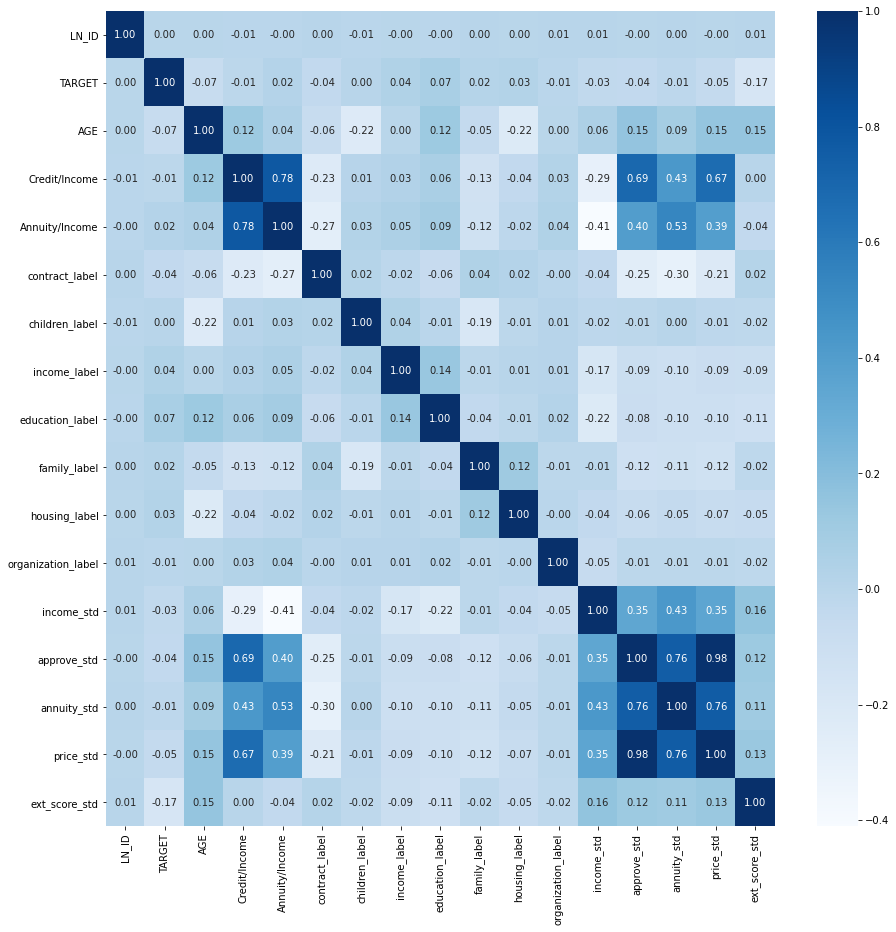

In [186]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Split Train & Test

In [187]:
x = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

In [188]:
# data splitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size=0.8, stratify=y, random_state=42)

In [197]:
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_val.shape)

Total rows & column of train set: (38245, 16)
Total rows & column of test set: (9562, 16)


The models used to solve the problem of appropriate lenders for this data are Random Forest, ADA Boost, and Light Gradient Boosting. The Reason is :
- Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
- AdaBoost adalah metode pembelajaran ensemble by using an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.
- Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models

## Random Forest

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

In [205]:
# create a function for trained models evaluation
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_train)
    test_pred = model_pipeline.predict(X_val)
    
    train_pred_proba = model_pipeline.predict_proba(X_train)
    test_pred_proba = model_pipeline.predict_proba(X_val)
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_val, test_pred))

In [206]:
# create model instant 
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)

# train model
rf.fit(X_train, y_train)

# evaluate model
evaluate_model(rf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 1.0000
Validation roc auc score= 0.6596

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[34811     0]
 [  187  3247]]
Validation confusion matrix:
 [[8700    4]
 [ 857    1]]


## ADA Boosting

In [194]:
# create model instant and pipeline
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# train model
adaboost.fit(X_train, y_train)

# evaluate model
evaluate_model(adaboost)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.7203
Validation roc auc score= 0.6946

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[34804     7]
 [ 3415    19]]
Validation confusion matrix:
 [[8700    4]
 [ 851    7]]


## Light Gradient Boosting

In [195]:
# create model instant and pipeline 
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=36, random_state=42)

# train model
lgbm.fit(X_train, y_train)

# evaluate model
evaluate_model(lgbm)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 1.0000
Validation roc auc score= 0.6567

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[34811     0]
 [  381  3053]]
Validation confusion matrix:
 [[8655   49]
 [ 839   19]]


### Conclusion
- The most important feature is Client Age, Clients\' Years work, Clients income
- Based on the results of the model, it can be seen that ADA Boosting is the best method to solve lender problems. the resulting AUC scores is 69%

# 2

- Better marketing strategy is Business marketing emails because with click-through rate 13,4%, the amount of money spent by consumers is greater than consumer marketing emails.
- from the graph it can also be seen that business marketing consumers look more effective than consumer marketing emails

# 3

- Covariate shift: training and test input follow different distributions, but functional relation remains unchanged.
- Sample selection bias: the training examples have been obtained through a biased method, such as non-uniform selection.
- Non-stationary environments: Training environment is different from the test one, whether it's due to a temporal or a spatial change. One typical scenario is adversarial classification problems, such as spam filtering and network intrusion detection.